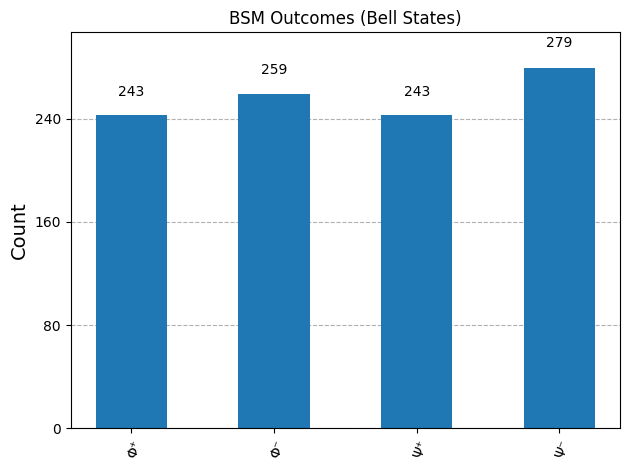

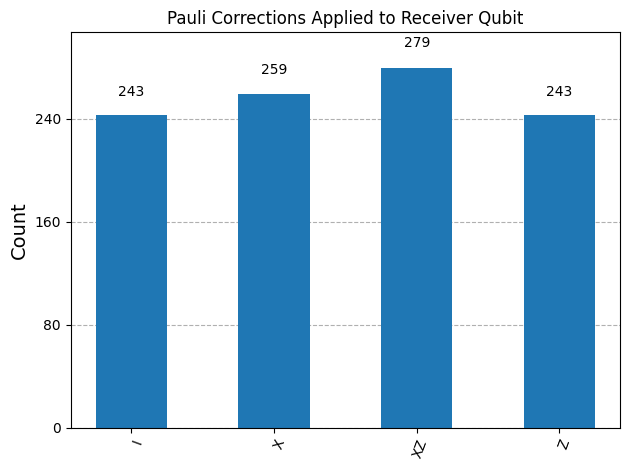

In [1]:
# ==============================
# Project 2 – Part B: Quantum Teleportation
# ==============================

# ------------------------------
# 1. Import Dependencies
# ------------------------------
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ------------------------------
# 2. Initialize Quantum Circuit
# ------------------------------
# Q0 = message qubit, Q1/Q2 = entangled pair
# C0/C1 = classical bits for BSM
qc = QuantumCircuit(3, 2)  # 3 qubits, 2 classical bits

# ------------------------------
# 3. Prepare the entangled pair (Q1-Q2)
# ------------------------------
qc.h(1)      # Hadamard on Q1
qc.cx(1, 2)  # CNOT to entangle Q1 and Q2

# ------------------------------
# 4. Bell-State Measurement (BSM) on message + entangled qubit
# ------------------------------
qc.cx(0, 1)  # CNOT: message qubit controls entangled qubit
qc.h(0)      # Hadamard on message qubit
qc.measure([0, 1], [0, 1])  # Measure Q0 + Q1 into C0 + C1

# ------------------------------
# 5. Execute Circuit and Get Counts
# ------------------------------
simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc_transpiled, shots=1024).result()
bsm_counts = result.get_counts()

# ------------------------------
# 6. Map classical outcomes to Bell states
# ------------------------------
bell_labels = {'00': 'Φ⁺', '01': 'Φ⁻', '10': 'Ψ⁺', '11': 'Ψ⁻'}
bsm_counts_labeled = {bell_labels[k]: v for k, v in bsm_counts.items()}

# Plot BSM outcomes
plot_histogram(bsm_counts_labeled, title="BSM Outcomes (Bell States)")
plt.show()

# ------------------------------
# 7. Map BSM outcomes to Pauli corrections
# ------------------------------
# Classical bits -> Pauli on Q2
pauli_map = {'00': 'I', '01': 'X', '10': 'Z', '11': 'XZ'}
pauli_counts = {pauli_map[k]: v for k, v in bsm_counts.items()}

# Plot histogram of Pauli corrections
plot_histogram(pauli_counts, title="Pauli Corrections Applied to Receiver Qubit")
plt.show()
